# IMPORTACIONES

In [1]:
import pandas as pd
import io
import json
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from joblib import dump

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# FUNCIONES


In [3]:
def draw_hist_boxplot(df,features_names):
  sns.boxplot(x=features_names, data = df)
  sns.stripplot(x=features_names, data = df, color = '#474646')


def replace_outliers_with_median(df, feature_name):
              Q1 = df[feature_name].quantile(0.25)
              median = df[feature_name].quantile(0.5)
              Q3 = df[feature_name].quantile(0.75)
              IQR = Q3 - Q1
              lower_whisker = Q1 - 1.5 * IQR
              upper_whisker = Q3 + 1.5 * IQR
              df[feature_name] = np.where((df[feature_name] < lower_whisker) |
                                          (df[feature_name] > upper_whisker),
                                          median,
                                          df[feature_name])
            
def columns_without_values(data):
    columns = data.isnull().sum()
    print(columns[columns > 0])

# CARGA DEL DATAFRAME Y LIMPIEZA DE DATOS

In [4]:
df_numbers = pd.read_json('/content/drive/MyDrive/result.json')

# Eliminar los datos mal cogidos

In [5]:
#df_categorical.drop(df_categorical[df_categorical.year < 2010].index, inplace = True)
df_numbers.drop(df_numbers[df_numbers.year < 2010].index, inplace = True)
#df

In [6]:
#df_categorical.drop(df_categorical[df_categorical.year > 2020].index, inplace = True)
df_numbers.drop(df_numbers[df_numbers.year > 2020].index, inplace = True)

In [7]:
df_numbers = df_numbers.drop(['fuelType','make','transmissionType', 'model', 'province','id','brand','brand_id', 'model_id', 'color', 'title', 'seller_type', 'fuel_types', 'bodyType', 'provinceId'], axis = 1)
#df_categorical = df_categorical.drop(['fuelTypeId','makeId', 'modelId', 'transmissionTypeId', 'provinceId','id','brand','brand_id', 'model_id'], axis = 1)

In [8]:
df_numbers

,fuelTypeId,km,makeId,modelId,price,transmissionTypeId,year,cubicCapacity,doors,hp
0,2,41080,46,322,10990,2,2015,1329,5,99
1,1,78576,48,285,17450,2,2016,1969,5,120
2,1,99999,7,70,20999,1,2015,1995,5,184
3,4,79000,15,39,19990,1,2016,1999,4,187
4,1,105000,28,8,31900,1,2016,2143,4,170
...,...,...,...,...,...,...,...,...,...,...
3242,1,182000,34,503,26500,1,2010,2967,5,240
3243,1,99000,34,1097,49990,1,2017,2967,5,258
3244,2,59900,34,1097,50900,1,2014,2997,5,340
3245,1,99999,34,1097,51900,1,2016,2967,5,258


# Mapa de calor

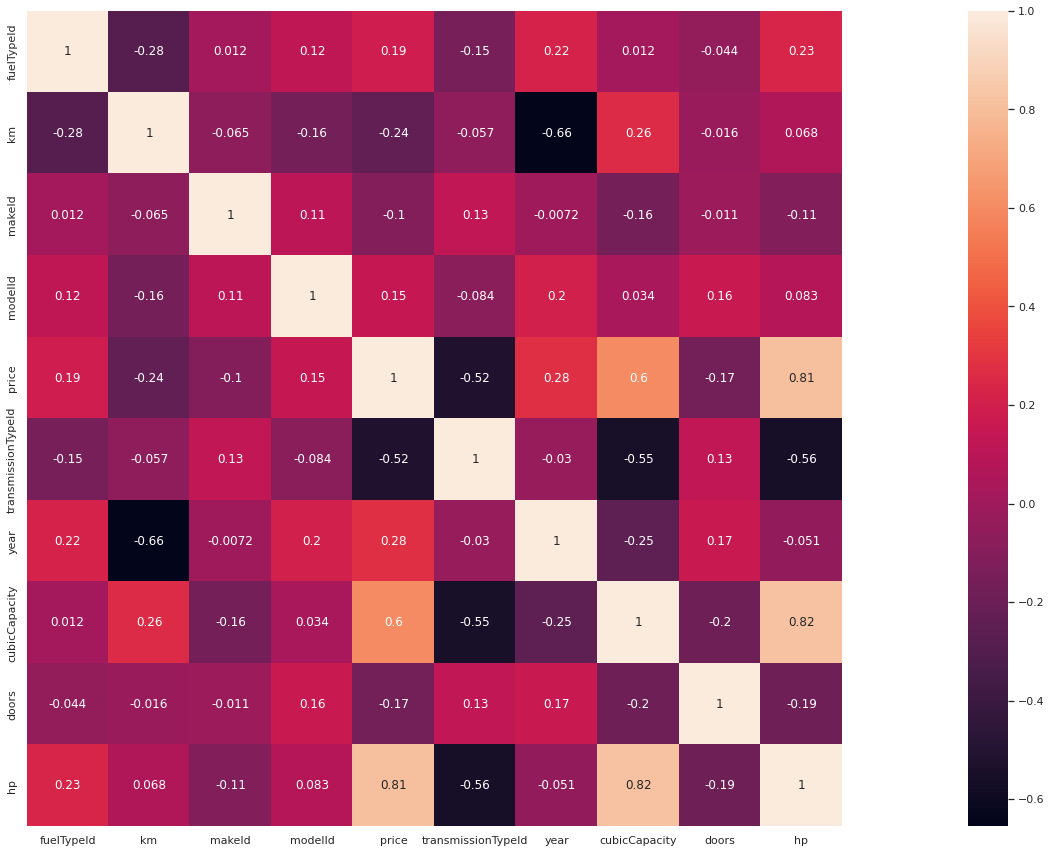

In [9]:
sns.set(rc = {'figure.figsize':(45,15)})
sns.heatmap(df_numbers.corr(), square=True, annot=True)

In [ ]:
#sns.set(rc = {'figure.figsize':(45,15)})
#sns.heatmap(df_categorical.corr(), square=True, annot=True)

# NORMALIZACION DE DATOS

1.   Crear una lista con los atributos distinguiendo los numericos de los categoricos
2.   Se borra la columna target de la lista donde este. En este caso, esta en la numerica al sel el precio
3. Todos los atributos menos el target


In [10]:
#features = list(df_numbers)
target = 'price'
#
#numeric_features = df_numbers._get_numeric_data().columns.tolist()
#
#categorical_features = list(set(features) - set(numeric_features))
#
#numeric_features.remove(target)

all_features = ['fuelTypeId', 'km', 'makeId', 'modelId','transmissionTypeId', 'year', 'cubicCapacity', 'doors', 'hp']

# Graficas

In [ ]:
#df_numbers[numeric_features].hist(ax=plt.figure(figsize = (15,15)).gca())
# datos que no parecen numericos: fuelTypeId, makeId, modelId, transimssionTypeId, Brand_id, model_id, doors
# Normalizar valores.

# OUTLIERS Numericos


# Graficas

In [ ]:
#draw_hist_boxplot(df,'km')

In [ ]:
#draw_hist_boxplot(df,'price')

In [ ]:
#replace_outliers_with_median(df, 'hp')
#draw_hist_boxplot(df,'hp')

In [ ]:
#draw_hist_boxplot(df,'cubicCapacity')

# Escalado de datos

In [ ]:
#from sklearn.preprocessing import StandardScaler
#data_escalado = df.copy()
#scaler = StandardScaler()
#real_numeric_features = ['km', 'cubicCapacity', 'hp', 'year', 'price']
## km, cc hp year y price son real_numeric_features
#data_escalado[real_numeric_features] = scaler.fit_transform(data_escalado[real_numeric_features])
#data_escalado[real_numeric_features].hist(ax=plt.figure(figsize=(15,15)).gca())

# MODELO

In [11]:
X_train_full, X_test = train_test_split(df_numbers[all_features + [target]], random_state=1)
X_train, X_val = train_test_split(X_train_full, random_state=1)
y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values
X_train.drop([target], axis=1, inplace=True)
X_val.drop([target], axis=1, inplace=True)
X_test.drop([target], axis=1, inplace=True)


# OneHot Encoding

In [28]:
from sklearn.feature_extraction import DictVectorizer
train_dict = X_train[all_features].to_dict(orient='records')
dict(sorted(train_dict[0].items()))
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [ ]:
from sklearn.linear_model import LinearRegression
l_estimators = [2,4,8,16,32,64,128,256]
total_mae = []
for estimator in l_estimators:
  model = RandomForestRegressor(n_estimators=estimator, criterion='absolute_error', random_state=0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  total_mae.append(mean_absolute_error(y_test,y_pred))

best_est = l_estimators[np.argmax(total_mae)]
best_score = min(total_mae)
print("Min value (estimator : %i, MAE: %6.2f" % (best_est, best_score))

#print(model.score(X_train, y_train))
#X_val = dv.transform(X_val[all_features].to_dict(orient='records'))
#print(model.score(X_val, y_val))
#X_test = dv.transform(X_test[all_features].to_dict(orient='records'))
#print(model.score(X_test, y_test))
#y_pred = model.predict(X_test)

In [12]:
model = RandomForestRegressor(n_estimators = 4, criterion='absolute_error', random_state=0)
model.fit(X_train.values, y_train)
y_predict = model.predict(X_test)
score = mean_absolute_error(y_test,y_predict)
sc = model.score(X_train, y_train)
sc

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9687948889618869

# Grafica comparativa

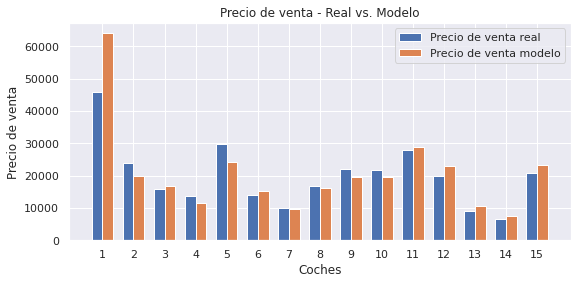

In [14]:
ind = np.arange(15)
width = 0.35
plt.figure(figsize=(9,4))
plt.bar(ind, y_test[100:115], width, label='Precio de venta real')
plt.bar(ind+width, y_predict[100:115], width, label='Precio de venta modelo')
plt.xticks(ind+width/2, np.arange(1, 16))
plt.legend(loc='best')
plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Modelo')

plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


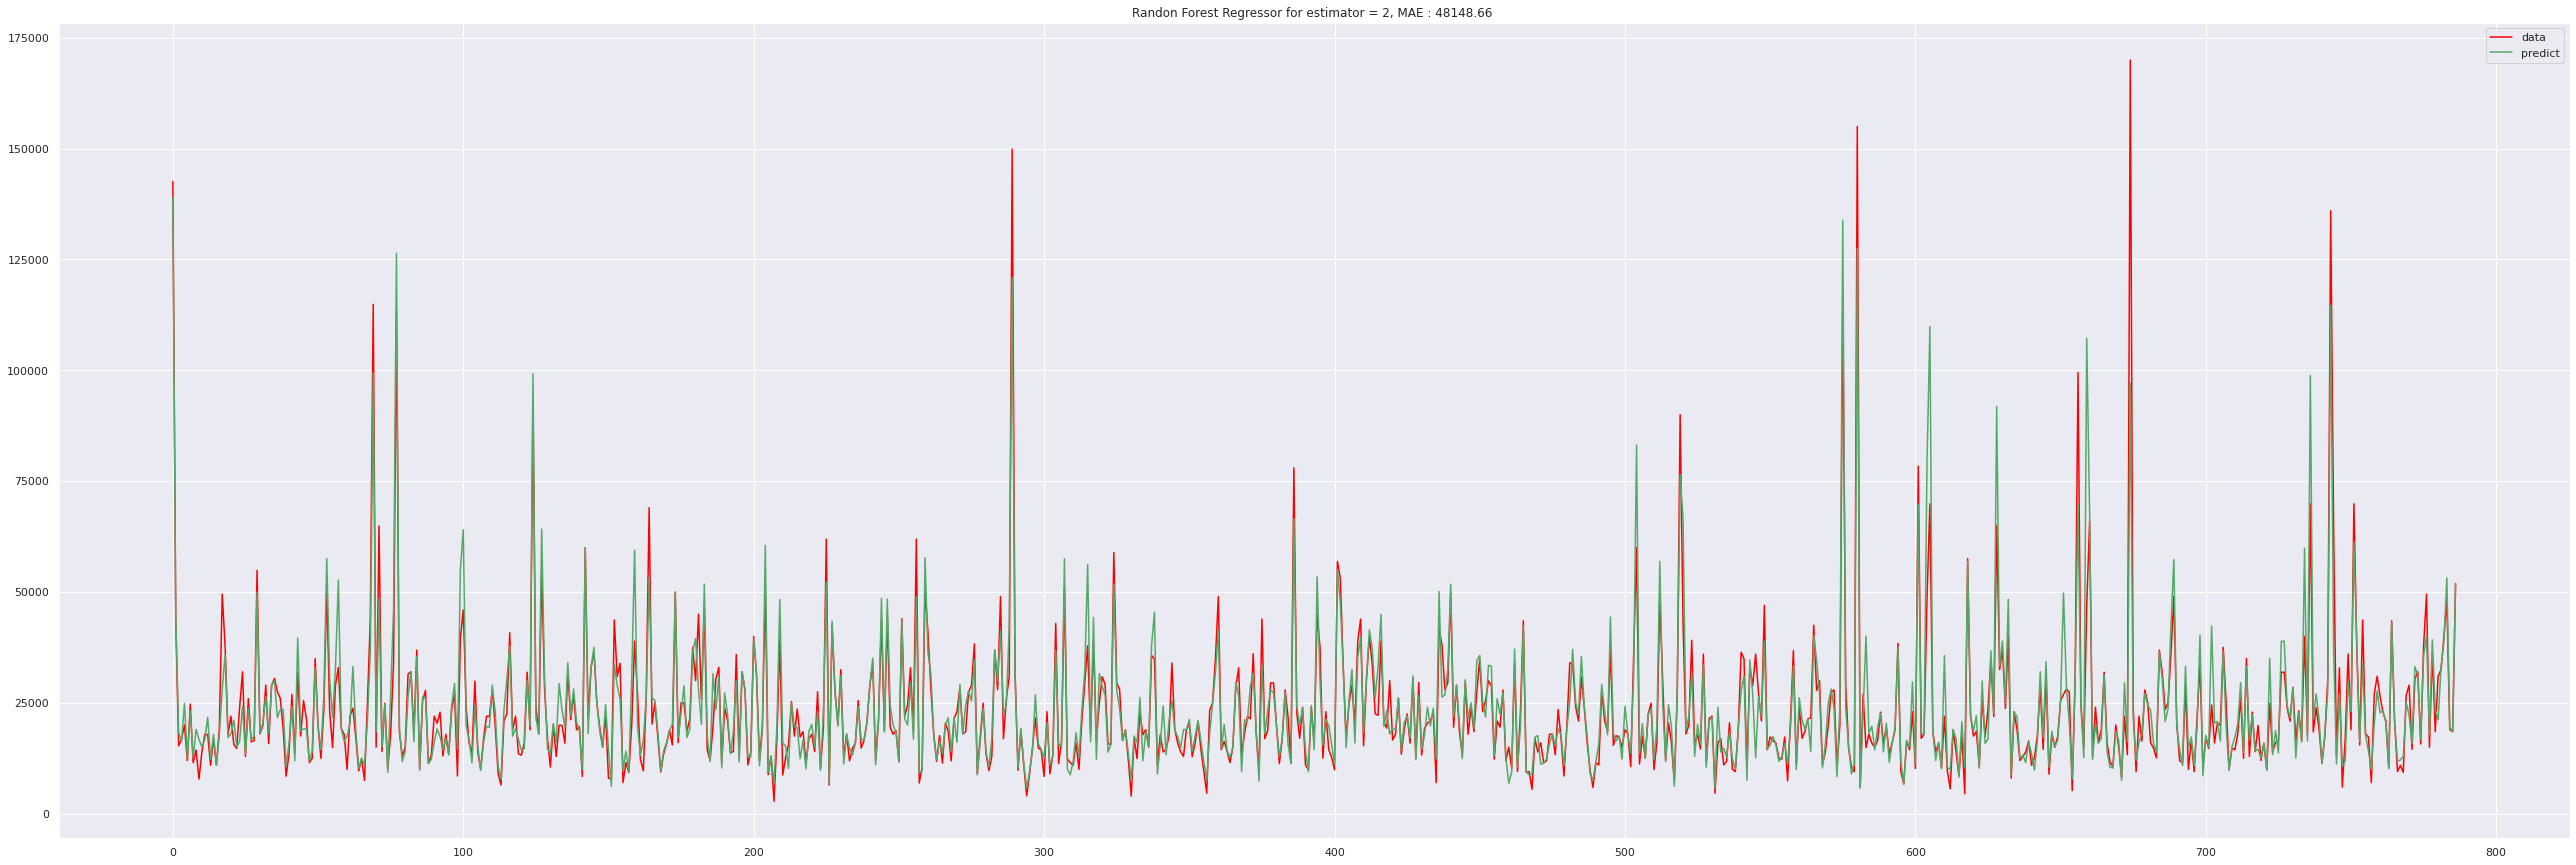

In [16]:
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx,y_test,c='red', label = 'data')
plt.plot(xx, y_predict, c='g', label = 'predict')
plt.axis('tight')
plt.legend()
plt.title('Randon Forest Regressor for estimator = 2, MAE : 48148.66 ')

plt.show()

In [17]:
dump(model, 'RandomForest.joblib') 

['RandomForest.joblib']